In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission_V9Inaty.csv")

In [3]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train_data.shape,test_data.shape

((550068, 12), (233599, 11))

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [8]:
train_data.duplicated().sum()

0

In [9]:
test_data.duplicated().sum()

0

In [10]:
train_data.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

<AxesSubplot:>

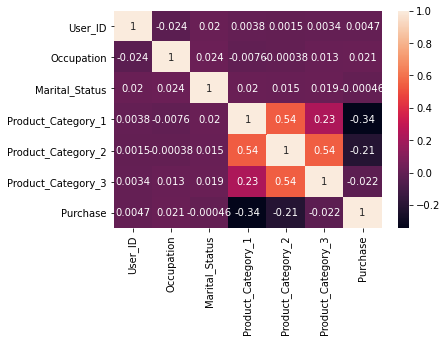

In [11]:
sns.heatmap(train_data.corr(),annot=True)

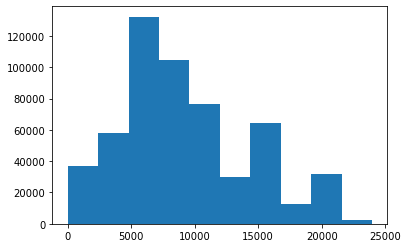

In [12]:

plt.hist(train_data['Purchase'])
plt.show()

In [13]:
train_data["data"]="train"
test_data["data"]="test"

In [14]:
all_data=pd.concat([train_data,test_data])
all_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,test
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test


In [15]:
columns =all_data.columns

In [16]:
all_data[columns].apply(lambda x: print(x.value_counts()))

1001680    1468
1004277    1384
1001941    1286
1001181    1230
1000889    1204
           ... 
1005117      13
1004991      13
1000708      13
1005804      13
1000341      13
Name: User_ID, Length: 5891, dtype: int64
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00074842       1
P00065142       1
P00062242       1
P00058842       1
P00165542       1
Name: Product_ID, Length: 3677, dtype: int64
M    590031
F    193636
Name: Gender, dtype: int64
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64
4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64
B    329739
C    243684
A    210244
Name: City_C

User_ID                       None
Product_ID                    None
Gender                        None
Age                           None
Occupation                    None
City_Category                 None
Stay_In_Current_City_Years    None
Marital_Status                None
Product_Category_1            None
Product_Category_2            None
Product_Category_3            None
Purchase                      None
data                          None
dtype: object

In [17]:
all_data[columns].apply(lambda x: x.nunique())

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
data                              2
dtype: int64

In [18]:

all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


<AxesSubplot:>

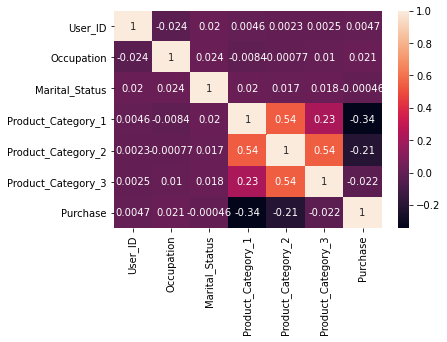

In [19]:
sns.heatmap(all_data.corr(),annot=True)

In [20]:
def convert_age_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return x
    except:
        return None

In [21]:
all_data['Age_Mean'] = all_data.Age.apply(convert_age_to_num)

In [22]:

 all_data.loc[all_data['Age_Mean'] == '55+', 'Age_Mean'] = 55
all_data[all_data['Age_Mean']=='55+']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data,Age_Mean


In [23]:

all_data['Age_Mean'] = all_data['Age_Mean'].astype(float)

In [24]:
all_data["Product_Category_2"] = all_data.Product_Category_2.transform(lambda x: x.fillna(-1))
all_data["Product_Category_3"] = all_data.Product_Category_3.transform(lambda x: x.fillna(-1))

In [25]:
 all_data.loc[all_data['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4
all_data[all_data['Stay_In_Current_City_Years']=='4+']
all_data['Stay_In_Current_City_Years'] = all_data['Stay_In_Current_City_Years'].astype(float)

In [26]:
del all_data['Age']



In [27]:
all_data["Occupation"]=all_data.Occupation.astype(str)
all_data["Marital_Status"]=all_data.Marital_Status.astype(str)

In [28]:
Product_ID_cnt=all_data["Product_ID"].value_counts()

In [29]:

all_data["Product_ID"]= all_data["Product_ID"].apply(lambda x : x.strip())

In [30]:
all_data["Product_ID"].value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00074842       1
P00065142       1
P00062242       1
P00058842       1
P00165542       1
Name: Product_ID, Length: 3677, dtype: int64

In [31]:
Product_ID_cnt_less_than_200=  Product_ID_cnt[Product_ID_cnt<=200]
Product_ID_cnt_less_than_200

P00034242    200
P00221642    200
P0009942     200
P00088542    200
P00295442    199
            ... 
P00074842      1
P00065142      1
P00062242      1
P00058842      1
P00165542      1
Name: Product_ID, Length: 2485, dtype: int64

In [32]:
all_data["Product_ID"]=all_data["Product_ID"].apply(lambda x : 'other' if x in Product_ID_cnt_less_than_200 else x )

In [33]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Occupation                  783667 non-null  object 
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  float64
 6   Marital_Status              783667 non-null  object 
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  data                        783667 non-null  object 
 12  Age_Mean                    783667 non-null  float64
dtypes: float64(5),

In [34]:
all_data = all_data.reset_index().drop(columns="index")

In [35]:
category_data_columns = all_data.select_dtypes(exclude = np.number).drop(columns=["data"]).columns

In [36]:
numeric_data_columns = all_data.select_dtypes(include = np.number).drop(columns = ["Purchase","User_ID"]).columns

In [37]:
preprocess_category_data_columns = pd.get_dummies(all_data[category_data_columns])
scaler = StandardScaler()

In [38]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(all_data[numeric_data_columns]), columns=numeric_data_columns)

In [39]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, all_data[["data","Purchase"]]], axis = 1)

In [40]:
final_preprocessed.shape

(783667, 1228)

In [41]:
train_preprocessed = final_preprocessed[final_preprocessed["data"]=="train"]

In [42]:
test_preprocessed = final_preprocessed[final_preprocessed["data"]=="test"]

In [43]:
test_preprocessed = test_preprocessed.drop(columns = ["data","Purchase"])

In [44]:
#train_preprocessed.to_csv("train_preprocessed.csv")
#test_preprocessed.to_csv("test_preprocessed.csv")

In [45]:
train_preprocessed.to_csv("train_preprocessed_1.csv")

test_preprocessed.to_csv("test_preprocessed_1.csv")